# Boston House price prediction using LinearRegression

In [1090]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
boston = load_boston()

In [1106]:
import sqlite3
con = sqlite3.connect("final.sqlite")

In [1108]:
pd.read_sql_query("SELECT * FROM sqlite_master", con)

,type,name,tbl_name,rootpage,sql
0,table,Reviews,Reviews,2,"CREATE TABLE ""Reviews"" (\n""index"" INTEGER,\n ..."
1,index,ix_Reviews_index,Reviews,91,"CREATE INDEX ""ix_Reviews_index""ON ""Reviews"" (""..."


In [1091]:
print(boston.data.shape)

(506, 13)


In [1092]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [1093]:
print(boston.target.shape)

(506,)


In [1094]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [1095]:
# Loading data into pandas dataframe
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [1096]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [1097]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [1098]:
# Standardization

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [1099]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [-0.87665426  0.37375936 -0.50588548  0.28410849 -0.40718428  3.13195112
 -0.38808112 -1.72845725  0.61670451 -0.5408917  -1.9444916   0.94032915
 -3.13142456]
Y_intercept [ 21.88507084]


# Stochastic Gradient Decent(SGD) for Linear Regression

In [246]:
# Imported necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [247]:
# Data loaded 
bostan = load_boston()

In [248]:
# Data shape
bostan.data.shape

(506, 13)

In [249]:
# Feature name
bostan.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [250]:
# This is y value i.e. target
bostan.target.shape

(506,)

In [251]:
# Convert it into pandas dataframe
data = pd.DataFrame(bostan.data, columns = bostan.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [252]:
# Statistical summary
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [253]:
#standardize for fast convergence to minima
data = (data - data.mean())/data.std()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [256]:
# MEDV(median value is usually target), change it to price
data["PRICE"] = bostan.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-0.417300,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.414859,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.414861,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.414270,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.410003,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [257]:
# Target and features
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

In [258]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


In [262]:
x_train["PRICE"] = y_train
#x_test["PRICE"] = y_test

C:\Users\premvardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [264]:
def cost_function(b, m, features, target):
    totalError = 0
    for i in range(0, len(features)):
        x = features
        y = target
        totalError += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return totalError / len(x)

In [265]:
# The total sum of squares (proportional to the variance of the data)i.e. ss_tot 
# The sum of squares of residuals, also called the residual sum of squares i.e. ss_res 
# the coefficient of determination i.e. r^2(r squared)
def r_sq_score(b, m, features, target):
    for i in range(0, len(features)):
        x = features
        y = target
        mean_y = np.mean(y)
        ss_tot = sum((y[:,i] - mean_y) ** 2)
        ss_res = sum(((y[:,i]) - (np.dot(x[i], m) + b)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
    return r2

In [770]:
def gradient_decent(w0, b0, train_data, x_test, y_test, learning_rate):
    n_iter = 500
    partial_deriv_m = 0
    partial_deriv_b = 0
    cost_train = []
    cost_test = []
    for j in range(1, n_iter):
        
        # Train sample
        train_sample = train_data.sample(160)
        y = np.asmatrix(train_sample["PRICE"])
        x = np.asmatrix(train_sample.drop("PRICE", axis = 1))
        for i in range(len(x)):
            partial_deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w0) + b0))
            partial_deriv_b += -2*(y[:,i] - (np.dot(x[i] , w0) + b0))
        
        w1 = w0 - learning_rate * partial_deriv_m 
        b1 = b0 - learning_rate * partial_deriv_b
        
        if (w0==w1).all():
            #print("W0 are\n", w0)
            #print("\nW1 are\n", w1)
            #print("\n X are\n", x)
            #print("\n y are\n", y)
            break
        else:
            w0 = w1
            b0 = b1
            learning_rate = learning_rate/2
       
            
        error_train = cost_function(b0, w0, x, y)
        cost_train.append(error_train)
        error_test = cost_function(b0, w0, np.asmatrix(x_test), np.asmatrix(y_test))
        cost_test.append(error_test)
        
        #print("After {0} iteration error = {1}".format(j, error_train))
        #print("After {0} iteration error = {1}".format(j, error_test))
        
    return w0, b0, cost_train, cost_test

Coefficient: [[-0.88458053]
 [-0.0295242 ]
 [-0.51389881]
 [ 1.54572575]
 [-1.04071224]
 [ 4.49241384]
 [ 0.43792264]
 [-1.23405424]
 [ 0.3800213 ]
 [ 0.03293416]
 [-1.57925241]
 [ 0.30357244]
 [-2.65148873]] 
 y_intercept: [[ 21.56359801]]


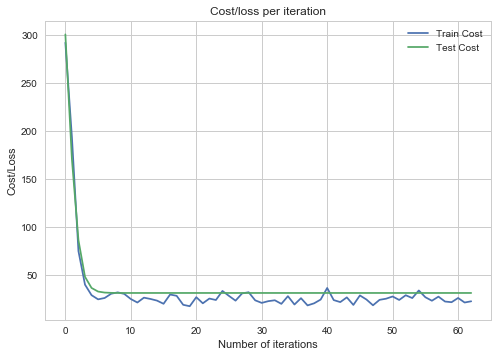

In [1085]:
# Run our model
learning_rate = 0.001
w0_random = np.random.rand(13)
w0 = np.asmatrix(w0_random).T
b0 = np.random.rand()

optimal_w, optimal_b, cost_train, cost_test = gradient_decent(w0, b0, x_train, x_test, y_test, learning_rate)
print("Coefficient: {} \n y_intercept: {}".format(optimal_w, optimal_b))

# Plot train and test error in each iteration
plt.figure()
plt.plot(range(len(cost_train)), np.reshape(cost_train,[len(cost_train), 1]), label = "Train Cost")
plt.plot(range(len(cost_test)), np.reshape(cost_test, [len(cost_test), 1]), label = "Test Cost")
plt.title("Cost/loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost/Loss")
plt.legend()
plt.show()

# Comparison between sklearn SGD and implemented SGD in python 

In [1100]:
# Sklearn SGD
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f" % r2_score(Y_test, Y_pred))

Mean squared error: 30.35
Variance score: 0.68


In [1101]:
# Implemented SGD
# The mean squared error
error = cost_function(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Mean squared error: %.2f" % (error))
# Explained variance score : 1 is perfect prediction
r_squared = r_sq_score(optimal_b, optimal_w, np.asmatrix(x_test), np.asmatrix(y_test))
print("Variance score: %.2f" % r_squared)

Mean squared error: 31.74
Variance score: 0.86


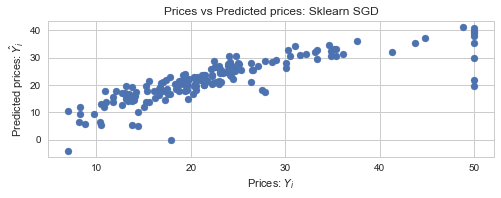

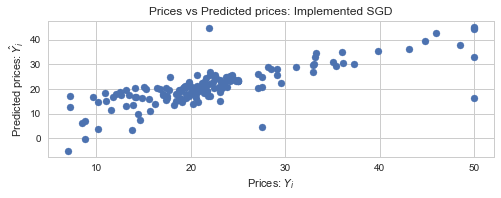

In [1102]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(1)
plt.subplot(211)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.subplot(212)
plt.scatter([y_test], [(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

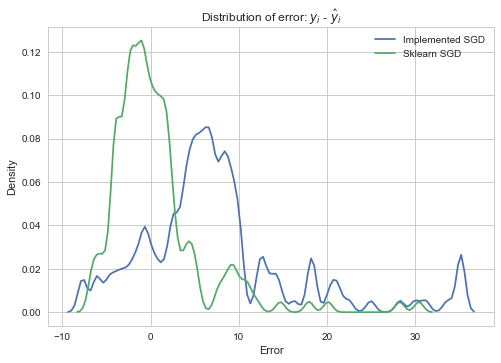

In [1103]:
# Distribution of error
delta_y_im = np.asmatrix(y_test) - (np.dot(np.asmatrix(x_test), optimal_w) + optimal_b)
delta_y_sk = Y_test - Y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.asarray(delta_y_im)[0], label = "Implemented SGD", bw = 0.5)
sns.kdeplot(np.array(delta_y_sk), label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error: $y_i$ - $\hat{y}_i$")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

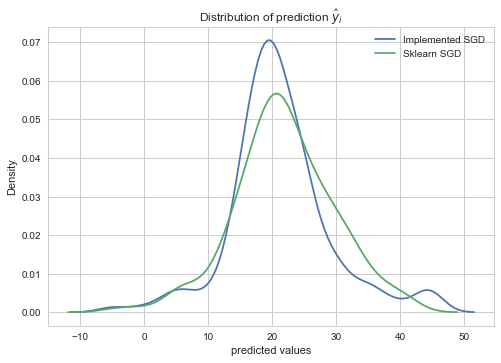

In [1104]:
# Distribution of predicted value
sns.set_style('whitegrid')
sns.kdeplot(np.array(np.dot(np.asmatrix(x_test), optimal_w) + optimal_b).T[0], label = "Implemented SGD")
sns.kdeplot(Y_pred, label = "Sklearn SGD")
plt.title("Distribution of prediction $\hat{y}_i$")
plt.xlabel("predicted values")
plt.ylabel("Density")
plt.show()

**observations**
* MSE is 30.35 means the total loss/error(squared difference of true/actual target value and predicted target value)i.e. we make while prediction. 0.0 is perfect i.e. no loss.
* coefficient of determination tells about the goodness of fit of a model and here, r^2 is 0.68 which means regression prediction does not perfectly fit the data. An r^2 of 1 indicates that regression prediction perfect fit the data.
* The mean squared error(mse) is quite high in implemented SGD means there are much more difference b/w predicted and actual points. i.e. average squared difference between the actual target value and predicted target value is high. lower value is better.
* r-squared score is 0.86, means the fit explain 86% of the total variation in the data about the average.
* After looking at the error graph we can say +ve side of the graph, error is more in implemented SGD whereas in sklearn SGD error is balanced or more error is at zero. i.e.
* By looking at the distribution of predicted value graph, It is clear that prediction of implemented SGD and sklearn SGD both are ovelapping(not perfectly) but the density of sklearn SGD is ~58% whereas implemented SGD is ~72% means the implemented SGD is predicting high value but in actual it is not.

**Conclusions**

* While comparing scikit-learn implemented linear regression and explicitly implemented linear regression using optimization algorithm(sgd) in python we see there are not much differences between both of them but sklearn SGD performs well over implemented SGD.
* Overall we can say the regression line not fits data perfectly but it is okay. But our goal is to find the line/plane that best fits our data means minimize the error i.e. mse should be close to 0.
* None of the above model are perfect but okay.
